# Basic Time Series Models - Lab

## Introduction

Now that you have some basic understanding of the white noise and random walk models, its time for you to implement them! 

## Objectives

In this lab you will: 

- Generate and analyze a white noise model 
- Generate and analyze a random walk model 
- Implement differencing in a random walk model 


## A White Noise model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September, and October of 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day 
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes  
- Create and visualize a time series that reflects this information 

Let's import `pandas`, `numpy`, and `matplotlib.pyplot` using their standard alias. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Do not change this seed
np.random.seed(12) 

Create the dates. You can do this using the `date_range()` function Pandas. More info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [2]:
# Create dates
dates = pd.date_range(start='08/01/2018',end='10/31/2018',freq='D')
dates

DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
               '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01',
               '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05',
               '2018-09-06', '2018-09-07', '2018-09-08', '2018-09-09',
               '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17',
               '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
      

Generate the values for the white noise process representing Nina's commute in August and September.

In [3]:
# Generate values for white noise
commute = np.random.normal(25,4,len(dates))

Create a time series with the dates and the commute times.

In [4]:
# Create a time series
commute_series = pd.Series(commute,index=dates)

Visualize the time series and set appropriate axis labels.

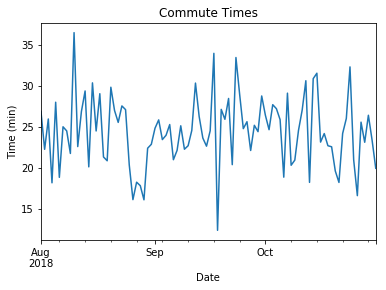

In [8]:
# Visualize the time series 
commute_series.plot()
plt.title('Commute Times')
plt.xlabel('Date')
plt.ylabel('Time (min)');

Print Nina's shortest and longest commute.

In [9]:
# Shortest commute
commute.min()

12.41033391382408

In [10]:
# Longest commute
commute.max()

36.487277579955666

Look at the distribution of commute times.

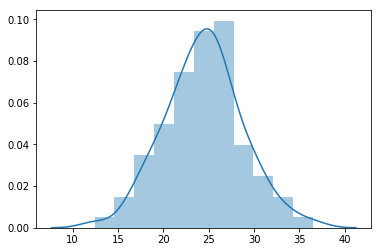

In [11]:
# Distribution of commute times
import seaborn as sns
sns.distplot(commute)

Compute the mean and standard deviation of `commute_series`. The fact that the mean and standard error are constant over time is crucial!

In [12]:
# Mean of commute_series
commute_series.mean()

24.437618956728112

In [13]:
# Standard deviation of commute_series
commute_series.std()

4.283443280014909

Now, let's look at the mean and standard deviation for August and October.  

In [15]:
# Mean and standard deviation for August and October
august=commute_series['08-2018']
october=commute_series['10-2018']
print(f'August mean: {august.mean()}')
print(f'August standard deviation: {august.std()}\n')
print(f'October mean: {october.mean()}')
print(f'October standard deviation: {october.std()}')

August mean: 24.01069167967552
August standard deviation: 4.7258063721016

October mean: 24.302794208974436
October standard deviation: 4.148224232744428


Because you've generated this data, you know that the mean and standard deviation will be the same over time. However, comparing mean and standard deviation over time is useful practice for real data examples to check if a process is white noise!

## A Random Walk model 

Recall that a random walk model has: 

- No specified mean or variance 
- A strong dependence over time 

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model: 

Starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) on January 1 2010 until end of November of the same year, generate a random walk model with a white noise error term, which has a standard deviation of 10.

In [25]:
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range(start='01-01-2010',end='11-30-2010',freq='D')

# White noise error term
error = np.random.normal(0,10,len(dates))

# Define random walk
def random_walk(start, error):        
    y=start
    total_error=np.cumsum(error)
    return y+total_error

shares_value = random_walk(1000, error)

shares_series = pd.Series(shares_value, index=dates)

Visualize the time series with correct axis labels. 

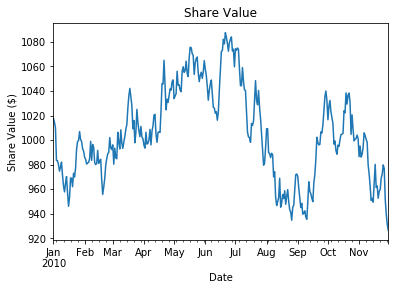

In [28]:
# Your code here
shares_series.plot()
plt.title('Share Value')
plt.xlabel('Date')
plt.ylabel('Share Value ($)');

You can see how this very much looks like the exchange rate series you looked at in the lesson!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [45]:
# Keep the random seed
np.random.seed(11)

def drift(start,error,c=None):
    y=start
    cumulative_error=np.cumsum(error+c)
    y+=cumulative_error
    return y

shares_value_drift=drift(1000,error,8)
shares_series_drift=pd.Series(shares_value_drift,index=dates)

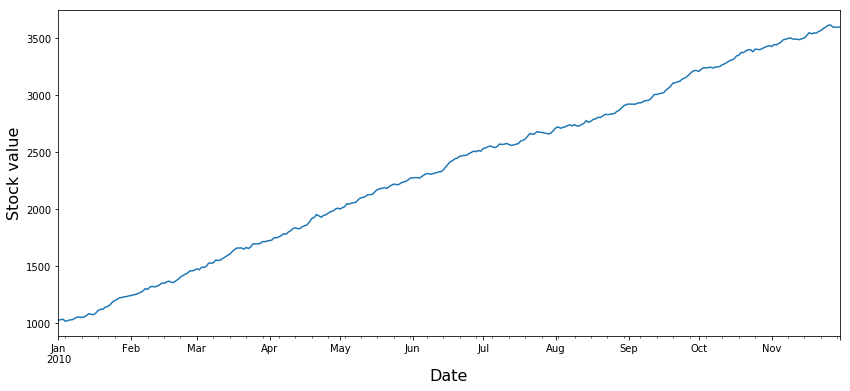

In [46]:
ax = shares_series_drift.plot(figsize=(14,6))
ax.set_ylabel('Stock value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show()

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the random walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series (time period of 1) for the shares time series (no drift).

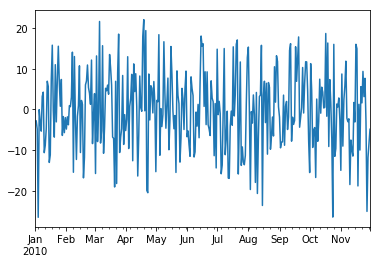

In [41]:
data_diff=shares_series.diff(periods=1)
data_diff.plot();

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

7.726224759032425

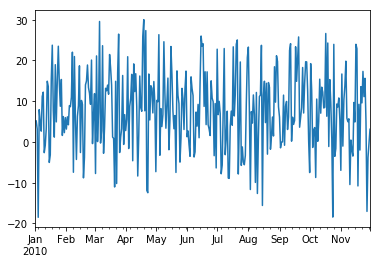

In [48]:
data_drift=shares_series_drift.diff(periods=1)
data_drift.plot();
data_drift.mean()

This is also a white noise series, but what can you tell about the mean? 

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how white noise and random walk models work!